In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn as sns
sns.set()

In [4]:
car = pd.read_csv('cars-used-price.csv')

In [5]:
car.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [6]:
car.shape

(38531, 30)

In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [8]:
car['year_produced'].unique()

array([2010, 2002, 2001, 1999, 2011, 1998, 2004, 2003, 2008, 2005, 2014,
       2013, 2006, 2007, 1997, 1994, 1993, 1991, 2016, 2009, 2012, 1995,
       1992, 2000, 1996, 2017, 2015, 1987, 2018, 1990, 2019, 1986, 1977,
       1982, 1981, 1979, 1978, 1984, 1980, 1988, 1985, 1989, 1960, 1975,
       1972, 1976, 1959, 1973, 1983, 1956, 1962, 1963, 1974, 1971, 1968,
       1967, 1966, 1964, 1969, 1965, 1950, 1942, 1961, 1970], dtype=int64)

In [9]:
car['price_usd'].unique()

array([10900.  ,  5000.  ,  2800.  , ...,  1382.91,  2035.95,  5666.  ])

In [10]:
car['manufacturer_name'].unique()

array(['Subaru', 'LADA', 'Dodge', 'УАЗ', 'Kia', 'Opel', 'Москвич',
       'Alfa Romeo', 'Acura', 'Dacia', 'Lexus', 'Mitsubishi', 'Lancia',
       'Citroen', 'Mini', 'Jaguar', 'Porsche', 'SsangYong', 'Daewoo',
       'Geely', 'ВАЗ', 'Fiat', 'Ford', 'Renault', 'Seat', 'Rover',
       'Volkswagen', 'Lifan', 'Jeep', 'Cadillac', 'Audi', 'ЗАЗ', 'Toyota',
       'ГАЗ', 'Volvo', 'Chevrolet', 'Great Wall', 'Buick', 'Pontiac',
       'Lincoln', 'Hyundai', 'Nissan', 'Suzuki', 'BMW', 'Mazda',
       'Land Rover', 'Iveco', 'Skoda', 'Saab', 'Infiniti', 'Chery',
       'Honda', 'Mercedes-Benz', 'Peugeot', 'Chrysler'], dtype=object)

In [11]:
car = car.drop(columns=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'], axis=1)
car.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,7


In [12]:
car.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
duration_listed       0
dtype: int64

In [13]:
import numpy as np

In [14]:
# converting 'price_usd' from float to int
car['price_usd'] = car['price_usd'].apply(np.int64)

In [15]:
display(car.dtypes)

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd              int64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
duration_listed        int64
dtype: object

In [16]:
car['price_usd'].unique()

array([10900,  5000,  2800, ...,  1382,  2035,  5666], dtype=int64)

In [17]:
new_car = car[['manufacturer_name','model_name','transmission','color','odometer_value','year_produced','engine_type', 'body_type','price_usd']]

In [18]:
new_car

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_type,body_type,price_usd
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,universal,10900
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,universal,5000
2,Subaru,Forester,automatic,red,402000,2001,gasoline,suv,2800
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,sedan,9999
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,universal,2134
...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,sedan,2750
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,hatchback,4800
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,sedan,4300
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,minivan,4000


In [19]:
new_car.to_csv('new_cars_list5.csv')

In [20]:
new_car.describe()

,odometer_value,year_produced,price_usd
count,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,6639.940204
std,136072.376530,8.065731,6428.143527
min,0.000000,1942.000000,1.000000
25%,158000.000000,1998.000000,2100.000000
50%,250000.000000,2003.000000,4800.000000
75%,325000.000000,2009.000000,8990.000000
max,1000000.000000,2019.000000,50000.000000


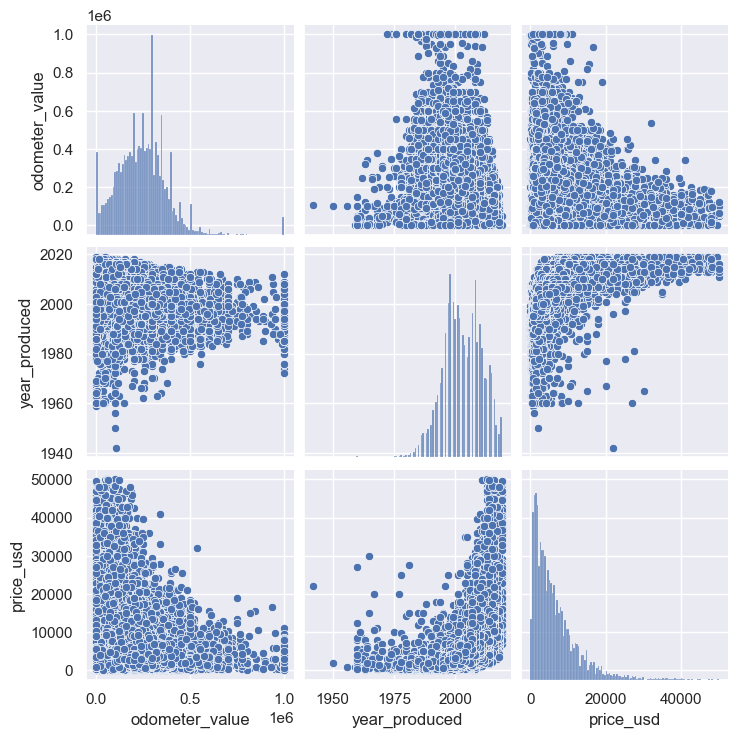

In [21]:
sns.pairplot(new_car)

C:\Users\nk\AppData\Local\Temp\ipykernel_3356\3786893833.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_car.corr(), annot=True)


<AxesSubplot: >

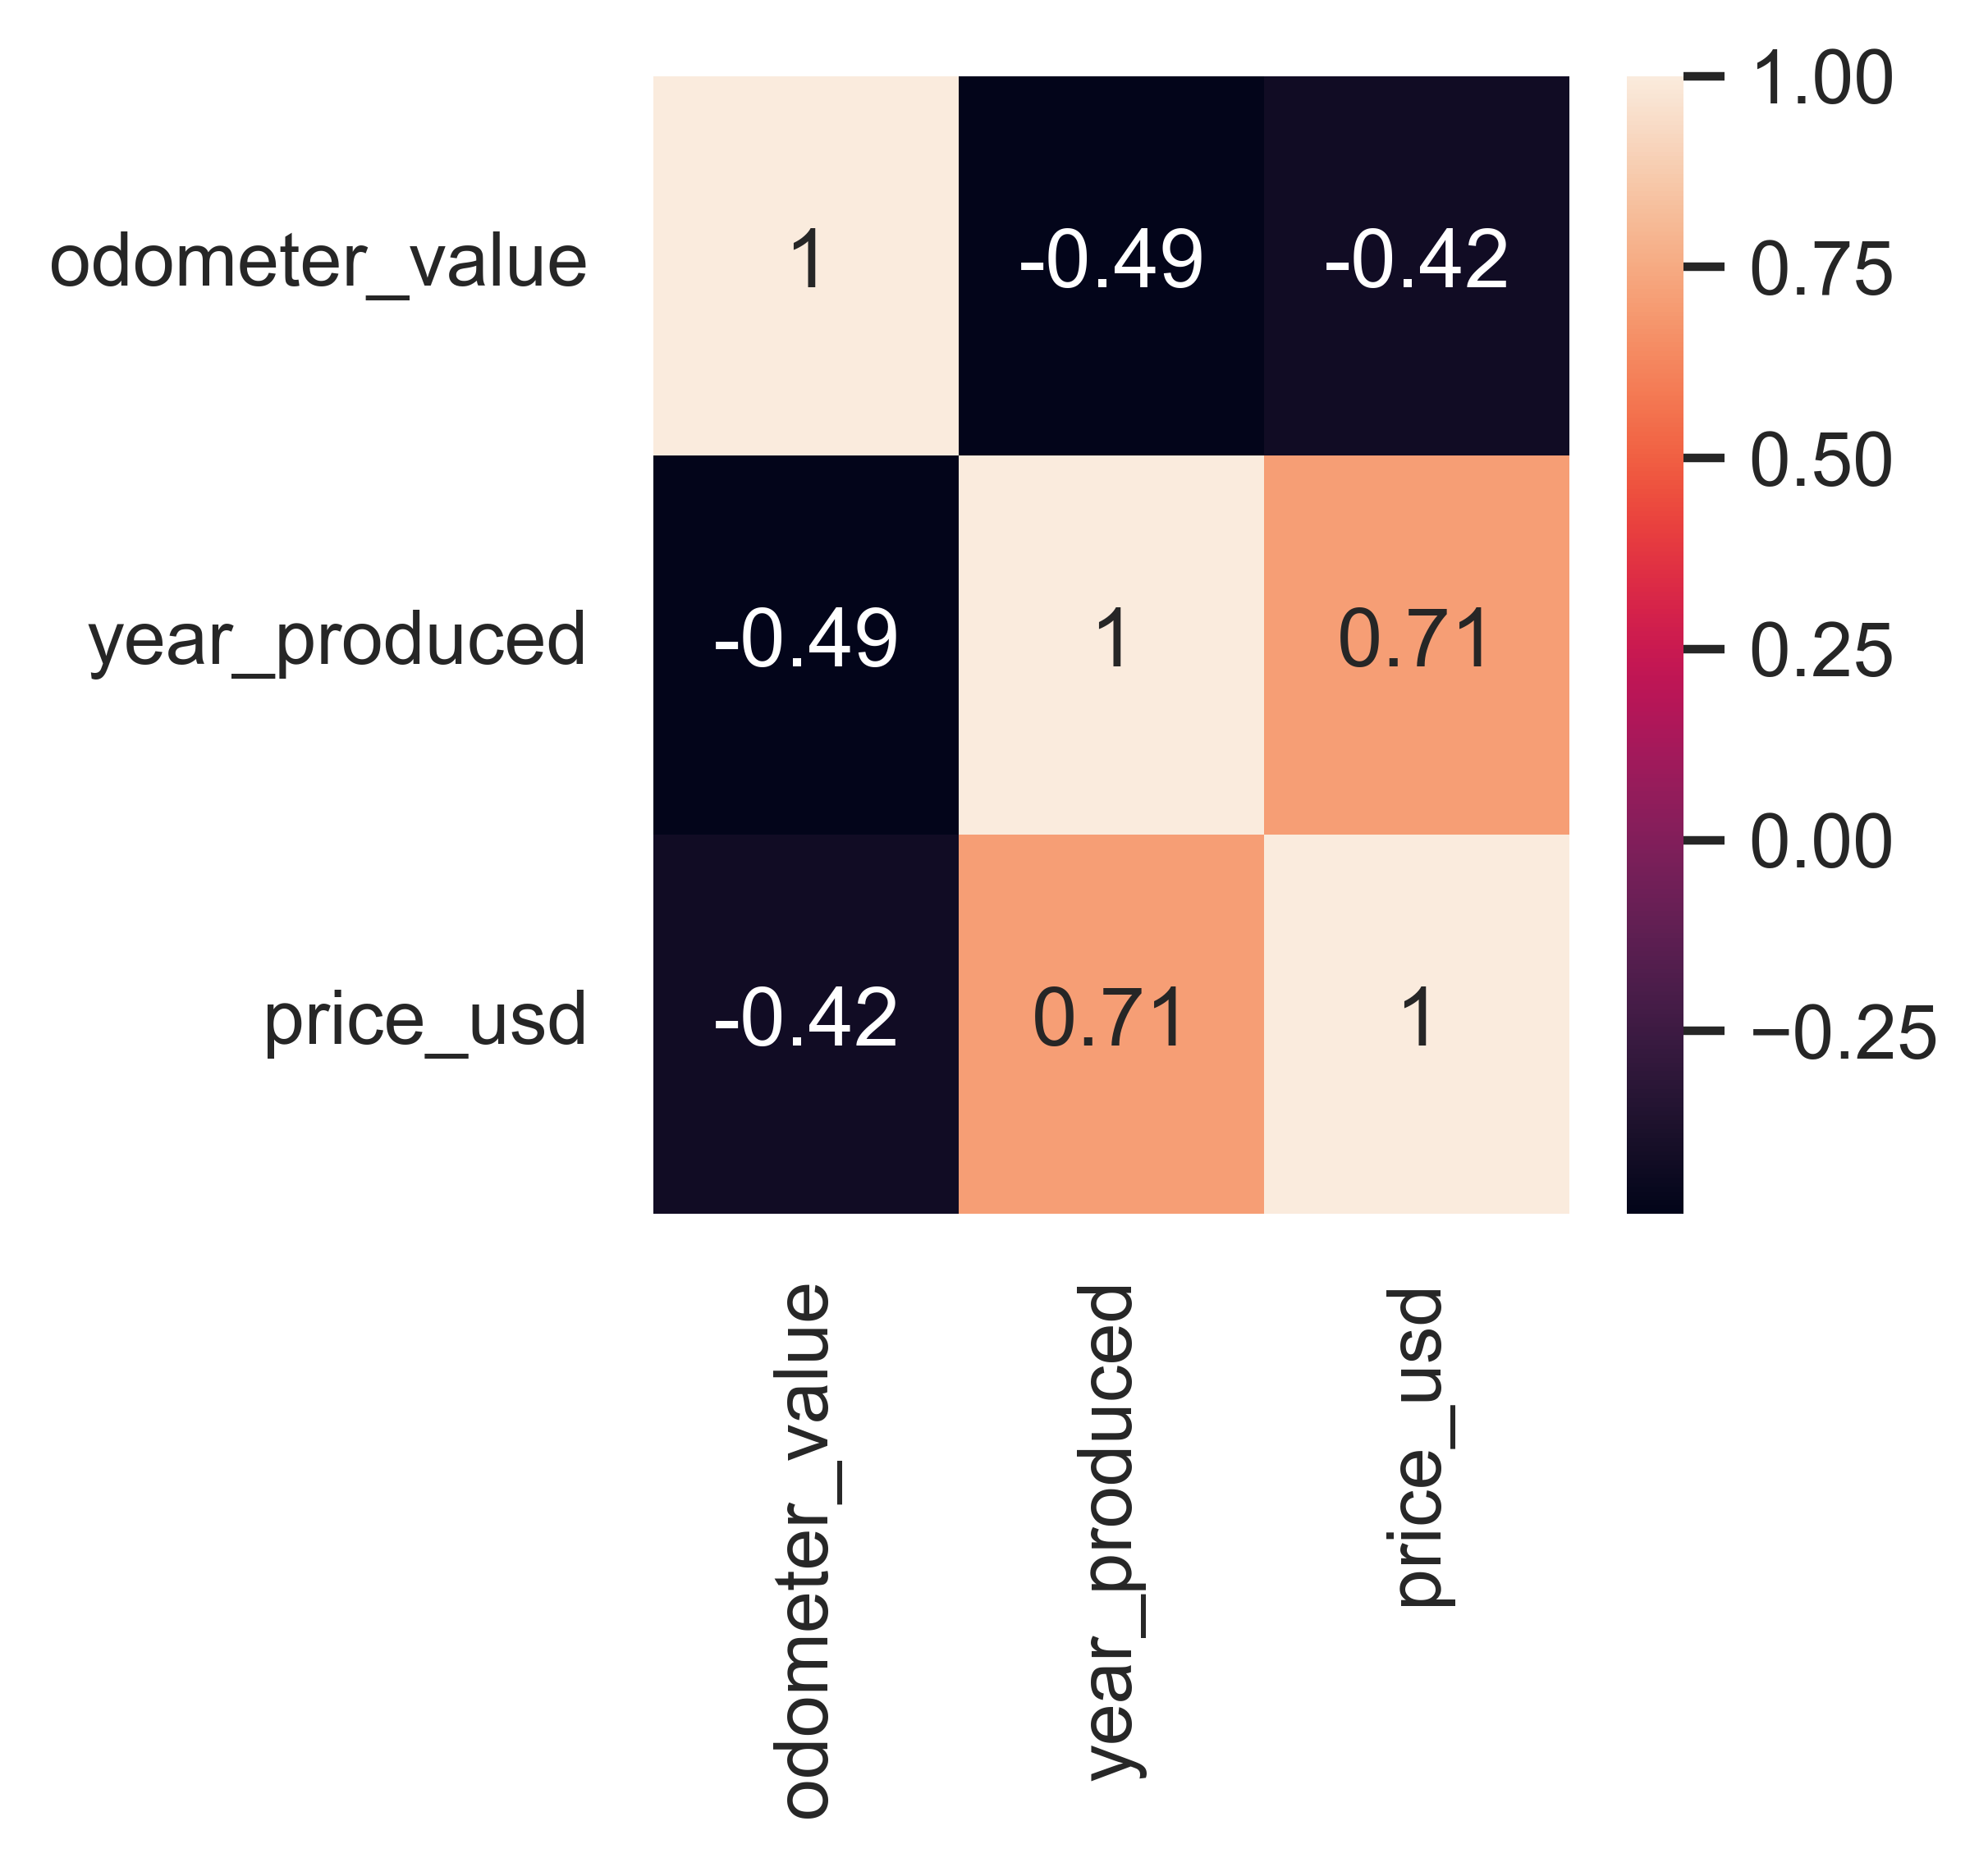

In [22]:
plt.subplots(figsize=(3,3), dpi = 600)
sns.heatmap(new_car.corr(), annot=True)

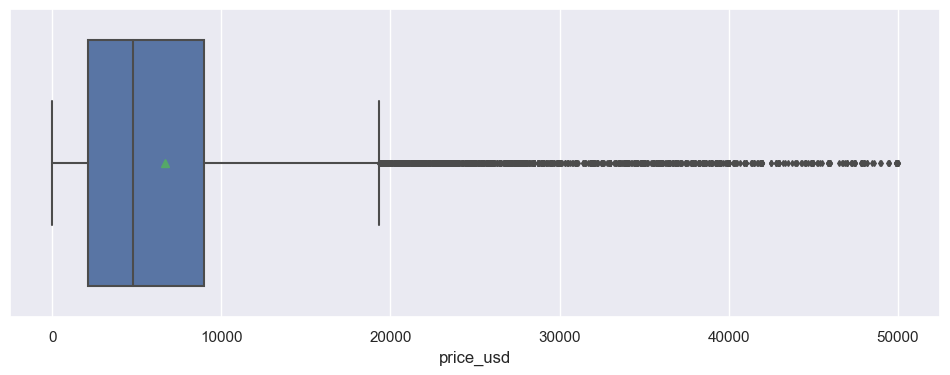

In [23]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price_usd', data = new_car, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

In [ ]:
pr = new_car['price_usd']
om = ["odometer_value"]


In [ ]:
#phase 4: plot and present linear equation
plt.figure(figsize=(15,6), dpi=300)
plt.scatter(x2,y)
yhat =  280.6236*x3 - 4.358e+04
fig = plt.plot(x3, yhat, lw=4, c='red', label='regression line')
plt.xlabel('sqft_living', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

# Model

Model


In [64]:
X = new_car.drop(columns='price_usd')
y = car['price_usd']

In [65]:
X

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_type,body_type
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,universal
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,universal
2,Subaru,Forester,automatic,red,402000,2001,gasoline,suv
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,sedan
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,universal
...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,sedan
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,hatchback
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,sedan
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,minivan


In [66]:
y

0        10900
1         5000
2         2800
3         9999
4         2134
         ...  
38526     2750
38527     4800
38528     4300
38529     4000
38530     3200
Name: price_usd, Length: 38531, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 25)

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [71]:
ohe = OneHotEncoder()
ohe.fit(X[[ 'manufacturer_name', 'model_name', 'transmission', 'color', 'engine_type', 'body_type']])

OneHotEncoder()

In [72]:
ohe.categories_

[array(['Acura', 'Alfa Romeo', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chery',
        'Chevrolet', 'Chrysler', 'Citroen', 'Dacia', 'Daewoo', 'Dodge',
        'Fiat', 'Ford', 'Geely', 'Great Wall', 'Honda', 'Hyundai',
        'Infiniti', 'Iveco', 'Jaguar', 'Jeep', 'Kia', 'LADA', 'Lancia',
        'Land Rover', 'Lexus', 'Lifan', 'Lincoln', 'Mazda',
        'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
        'Pontiac', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat', 'Skoda',
        'SsangYong', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo',
        'ВАЗ', 'ГАЗ', 'ЗАЗ', 'Москвич', 'УАЗ'], dtype=object),
 array(['100', '1007', '100NX', ..., 'М5', 'Соболь', 'Таврия'],
       dtype=object),
 array(['automatic', 'mechanical'], dtype=object),
 array(['black', 'blue', 'brown', 'green', 'grey', 'orange', 'other',
        'red', 'silver', 'violet', 'white', 'yellow'], dtype=object),
 array(['diesel', 'electric', 'gasoline'], dtype=object),
 array(['cabriolet', 'coupe', 

In [73]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['manufacturer_name', 'model_name', 'transmission', 'color', 'engine_type', 'body_type']), remainder = 'passthrough')

In [74]:
lr = LinearRegression()

In [75]:
pipe = make_pipeline(column_trans, lr)

In [76]:
from sklearn import preprocessing as pre
scaler = pre.StandardScaler()

In [77]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Acura', 'Alfa Romeo', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chery',
       'Chevrolet', 'Chrysler', 'Citroen', 'Dacia', 'Daewoo', 'Dodge',
       'Fiat', 'Ford', 'Geely', 'Great Wall', 'Honda', 'Hyundai',
       'Infiniti', 'Iveco', 'Jaguar', 'Jeep', 'K...
       'red', 'silver', 'violet', 'white', 'yellow'], dtype=object),
                                                                            array(['diesel', 'electric', 'gasoline'], dtype=object),
                                                                            array(['cabriolet', 'coupe', 'hatchback', 'liftback', 'limousine',
       'minibus', 'minivan', 'pickup', 'sedan', 'suv', 'universal', 'van'],
      dtype=object)]),
                                                  ['manufacturer_name',
                                                   'model_name', 'transmission',
                                                   'color', 'engine_type',
                                                   'body_type'])])),
                ('linearregression', LinearRegression())])

In [78]:
y_pred = pipe.predict(X_test)

In [79]:
r2_score(y_test,y_pred)

0.6305607436265785

In [80]:
scores=[]
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans, lr)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [81]:
import pickle

In [84]:
pickle.dump(pipe,open('LinearRegressionModelForCar3.pkl', 'wb'))

In [85]:
pipe.predict(pd.DataFrame([['Subaru','Outback','automatic', 'silver', 190000, 2010, 'gasoline', 'universal', False]], columns=['manufacturer_name','model_name', 'transmission', 'color', 'odometer_value','year_produced','engine_type', 'body_type', 'has_warranty' ]))

array([10802.73954707])

In [86]:
pd.DataFrame({'y':y_test, 'y_predict':y_pred}).head(50)

,y,y_predict
8082,1700,2710.902687
3884,1000,2334.765953
6015,3750,5789.137003
5333,3500,4269.310499
4382,1800,1499.749471
34884,7200,11192.764038
10244,7000,5981.504917
15428,3950,3894.144188
6063,3650,3234.501191
13235,12000,14543.247665


In [87]:
new_car.tail()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_type,body_type,price_usd
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,sedan,2750
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,hatchback,4800
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,sedan,4300
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,minivan,4000
38530,Chrysler,Voyager,automatic,silver,297729,2000,gasoline,minivan,3200


In [88]:
import joblib
filename = 'car_model.sav'
joblib.dump(pipe,filename)

['car_model.sav']